In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Obtener los datos 
En el ejemplo anterior de clasificación nos topamos con el problema de graficar el conjunto multidimensional de cáncer de mama. 

In [2]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()

In [4]:
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [5]:
cancer_X=cancer.data

## Visualización en dos dimensiones usando PCA

No es sencillo visualizar datos multidimensionales, ya que no se pueden representar fácilmente de manera gráfica y es difícil seleccionar las dimensiones que mejor representen los datos.  Para este tipo de problemas se utiliza la reducción dimensional. 

En general  para obtener mejores resultados al aplicar aprendizaje máquina se recomienda pre-procesar los datos , por eso para este ejemplo se les aplicará un pre-procesamiento de estandarización a los datos   

In [6]:


from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
scaler.fit(cancer_X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
cancer_scaled_data = scaler.transform(cancer_X)

## Importar el modelo

In [10]:
from sklearn.decomposition import PCA

## Ajustar Parámetros del modelo

In [11]:
pca = PCA(n_components=2)

## Ajuste del modelo

In [12]:
pca.fit(cancer_scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

## Predecir resultados

In [13]:
cancer_pca = pca.transform(cancer_scaled_data)

In [14]:
print(cancer_scaled_data.shape)
print(cancer_pca.shape)

(569, 30)
(569, 2)


Con esto se ha logrado reducir el problema de 30 dimensiones a solo dos dimensiones, con esto ya lo podemos graficar 

Text(0,0.5,'Second Principal Component')

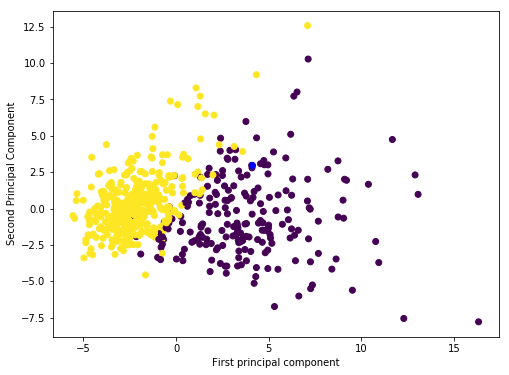

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(cancer_pca[:,0],cancer_pca[:,1],c=cancer['target'])
plt.scatter(NEW_pca[0][0],NEW_pca[0][1],c="blue")
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [17]:
DATO_NEW=cancer_X[15]
NEW_scaled_data = scaler.transform([DATO_NEW])
NEW_pca = pca.transform(NEW_scaled_data)
print(DATO_NEW)
print(NEW_scaled_data)
print(NEW_pca)

[  1.45400000e+01   2.75400000e+01   9.67300000e+01   6.58800000e+02
   1.13900000e-01   1.59500000e-01   1.63900000e-01   7.36400000e-02
   2.30300000e-01   7.07700000e-02   3.70000000e-01   1.03300000e+00
   2.87900000e+00   3.25500000e+01   5.60700000e-03   4.24000000e-02
   4.74100000e-02   1.09000000e-02   1.85700000e-02   5.46600000e-03
   1.74600000e+01   3.71300000e+01   1.24100000e+02   9.43200000e+02
   1.67800000e-01   6.57700000e-01   7.02600000e-01   1.71200000e-01
   4.21800000e-01   1.34100000e-01]
[[ 0.117215    1.91991217  0.19610517  0.01112299  1.24822184  1.04534495
   0.94288692  0.63764927  1.79400557  1.13016926 -0.12694334 -0.33357334
   0.00640608 -0.17132905 -0.47801235  0.94575503  0.51447377 -0.1453621
  -0.23880298  0.63209436  0.24659599  1.8650136   0.5015574   0.11007499
   1.55316726  2.56640999  2.06490938  0.86173065  2.13101227  2.77933504]]
[[ 4.07565618  2.97706118]]


In [25]:
print(cancer['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

Cabe resaltar que para representar adecuadamente las 30 dimensiones, las dos dimensiones obtenidas por el método PCA pierden un significado ya que combinan la información de las 30 dimensiones.